In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math
from scipy.stats import binom, poisson

# Binomial

In [2]:
np.random.choice(["R", "R", "R", "B", "B"], size=4)

array(['R', 'R', 'R', 'R'], dtype='<U1')

In [3]:
rolls = np.random.choice(["R", "R", "R", "B", "B"], size=4)
np.count_nonzero(rolls=="R")

3

In [4]:
num_people = 1000
red_values = []
for person in range(num_people):
    rolls = np.random.choice(["R", "R", "R", "B", "B"], size=4)
    num_reds = np.count_nonzero(rolls=="R")
    red_values.append(num_reds)
red_values

[4,
 3,
 1,
 1,
 2,
 2,
 1,
 3,
 3,
 2,
 1,
 2,
 1,
 3,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 3,
 3,
 4,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 2,
 2,
 4,
 3,
 1,
 2,
 2,
 3,
 4,
 2,
 2,
 3,
 2,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 3,
 3,
 3,
 4,
 0,
 2,
 1,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 4,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 4,
 3,
 2,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 0,
 1,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 4,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 0,
 2,
 1,
 4,
 3,
 2,
 4,
 4,
 2,
 2,
 2,
 2,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 4,
 3,
 3,
 4,
 3,
 3,
 2,
 2,
 1,
 4,
 2,
 3,
 0,
 2,
 3,
 1,
 2,
 2,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 2,
 3,
 2,
 2,
 1,
 3,
 4,
 1,
 2,
 2,
 2,
 3,
 3,
 4,
 2,
 2,
 0,
 2,
 1,
 3,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 4,
 2,
 3,
 2,
 4,
 1,
 2,
 1,
 2,
 3,
 4,
 1,
 1,
 2,
 1,
 4,
 2,
 3,
 0,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 4,
 4,
 2,
 2,
 4,
 3,
 2,
 2,
 3,
 0,
 1,
 3,
 0,
 2,


In [5]:
df_red_value_counts = pd.value_counts(red_values).sort_index()
df_red_value_counts

0     28
1    151
2    352
3    347
4    122
dtype: int64

<AxesSubplot:>

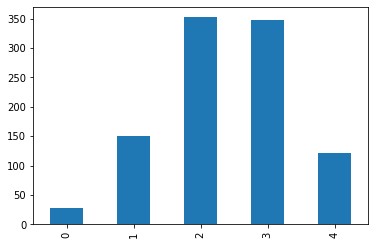

In [6]:
df_red_value_counts.plot.bar()

In [7]:
df_probabilities = df_red_value_counts / num_people
df_probabilities

0    0.028
1    0.151
2    0.352
3    0.347
4    0.122
dtype: float64

<AxesSubplot:>

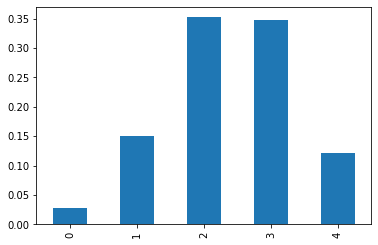

In [8]:
df_probabilities.plot.bar()

In [9]:
np.mean(red_values)

2.384

Theoretical

In [13]:
# 4C0 (2/5)^4
# 4C0: math.comb(4, 0)
prob_zero_red = math.comb(4, 0) * (2/5)*(2/5)*(2/5)*(2/5)
prob_zero_red

0.025600000000000008

pmf = probability mass function

In [15]:
binom.pmf(k=0, n=4, p=3/5)

0.025600000000000005

In [16]:
prob_one_red = math.comb(4, 1) * (2/5)*(2/5)*(2/5)*(3/5)
prob_one_red

0.15360000000000004

In [17]:
binom.pmf(k=1, n=4, p=3/5)

0.15359999999999993

In [18]:
prob_two_red = math.comb(4, 2) * (2/5)*(2/5)*(3/5)*(3/5)
prob_two_red

0.3456

In [19]:
binom.pmf(k=2, n=4, p=3/5)

0.34560000000000024

In [20]:
prob_three_red = math.comb(4, 3) * (2/5)*(3/5)*(3/5)*(3/5)
prob_three_red

0.34559999999999996

In [21]:
binom.pmf(k=3, n=4, p=3/5)

0.3456

In [22]:
prob_four_red = math.comb(4, 4) * (3/5)*(3/5)*(3/5)*(3/5)
prob_four_red

0.1296

In [24]:
binom.pmf(k=4, n=4, p=3/5)

0.1296

In [25]:
0 * prob_zero_red + 1 * prob_one_red + 2 * prob_two_red + 3 * prob_three_red + 4 * prob_four_red

2.4000000000000004

In [26]:
binom.expect(args=(4, 3/5))

2.4000000000000004

# Poisson

Rate for 90 mins is 2.5 goals<br>
Rate for 30 mins is 2.5/3 goals

In [29]:
poisson.pmf(k=1, mu=2.5/3) # 30 minute

0.3621651737558985

In [31]:
poisson.pmf(k=1, mu=2.5) # 90 minute

0.205212496559747

In [32]:
poisson.pmf([0, 1, 2, 3, 4, 5, 6, 7], mu=2.5) # 90 mins

array([0.082085  , 0.2052125 , 0.25651562, 0.21376302, 0.13360189,
       0.06680094, 0.02783373, 0.00994062])

In [34]:
x_values = np.arange(0, 15)
y_values = poisson.pmf(x_values, mu=2.5) # 90 mins

<BarContainer object of 15 artists>

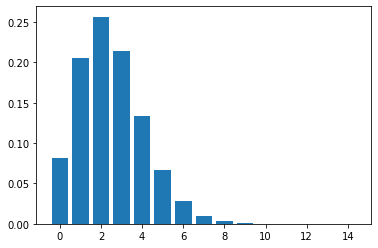

In [35]:
plt.bar(x_values, y_values)